In [34]:
pip install mlxtend


In [35]:
import pandas as pd
import numpy as np
import ast
from mlxtend.preprocessing import TransactionEncoder
from sklearn.decomposition import TruncatedSVD
import joblib


In [36]:
df = pd.read_csv("Groceries_dataset.csv")


In [37]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [38]:
import pandas as pd

# Convert to list of transactions (group by customer/member)
transactions = df.groupby("Member_number")["itemDescription"].apply(
    lambda x: x.str.lower().tolist()
).tolist()

print("Number of transactions:", len(transactions))
transactions[:5]   # show first 5 transactions


Number of transactions: 3898


[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [39]:
transactions = [list(set(t)) for t in transactions]


In [40]:
transactions[:5]


[['pastry',
  'sausage',
  'salty snack',
  'soda',
  'whole milk',
  'semi-finished bread',
  'canned beer',
  'pickled vegetables',
  'misc. beverages',
  'hygiene articles',
  'yogurt'],
 ['sausage',
  'white bread',
  'soda',
  'whole milk',
  'frankfurter',
  'beef',
  'curd',
  'whipped/sour cream',
  'rolls/buns'],
 ['butter milk',
  'sugar',
  'tropical fruit',
  'specialty chocolate',
  'whole milk',
  'frozen vegetables',
  'butter',
  'other vegetables'],
 ['detergent',
  'frozen meals',
  'dental care',
  'sausage',
  'rolls/buns',
  'root vegetables'],
 ['red/blush wine',
  'cling film/bags',
  'pip fruit',
  'chocolate',
  'shopping bags',
  'whole milk',
  'tropical fruit',
  'rolls/buns',
  'canned beer',
  'root vegetables',
  'hygiene articles',
  'packaged fruit/vegetables',
  'dish cleaner',
  'frozen fish',
  'pastry',
  'other vegetables']]

In [41]:
len(transactions)

3898

In [42]:
df_onehot = df.groupby("Member_number")["itemDescription"].apply(
    lambda x: pd.Series(1, index=x.unique())
).unstack().fillna(0).astype(bool)


In [43]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)
frequent_itemsets.head()


,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)


In [44]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,1.0,0.001133,1.010396,0.122392,0.056088,0.010289,0.110985
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,1.0,0.001133,1.016672,0.116940,0.056088,0.016399,0.110985
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,1.0,0.002413,1.037933,0.176014,0.066897,0.036547,0.141621
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,1.0,0.002413,1.016769,0.192815,0.066897,0.016492,0.141621
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,1.0,0.004517,1.023477,0.269801,0.078598,0.022939,0.185441
5,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,1.0,0.004517,1.078960,0.230217,0.078598,0.073181,0.185441
6,(brown bread),(UHT-milk),0.135967,0.078502,0.012314,0.090566,1.153681,1.0,0.001640,1.013266,0.154172,0.060914,0.013092,0.123714
7,(UHT-milk),(brown bread),0.078502,0.135967,0.012314,0.156863,1.153681,1.0,0.001640,1.024783,0.144557,0.060914,0.024184,0.123714
8,(UHT-milk),(butter),0.078502,0.126475,0.010518,0.133987,1.059394,1.0,0.000590,1.008674,0.060840,0.054090,0.008599,0.108576
9,(butter),(UHT-milk),0.126475,0.078502,0.010518,0.083164,1.059394,1.0,0.000590,1.005085,0.064181,0.054090,0.005060,0.108576


In [45]:
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15177,"(whole milk, sausage, other vegetables)","(rolls/buns, yogurt)",0.050282,0.111339,0.013597,0.270408,2.428689,1.0,0.007998,1.218025,0.619400,0.091854,0.178999,0.196264
15192,"(rolls/buns, yogurt)","(whole milk, sausage, other vegetables)",0.111339,0.050282,0.013597,0.122120,2.428689,1.0,0.007998,1.081831,0.661957,0.091854,0.075641,0.196264
15184,"(rolls/buns, yogurt, other vegetables)","(whole milk, sausage)",0.052335,0.106978,0.013597,0.259804,2.428575,1.0,0.007998,1.206467,0.620721,0.093310,0.171133,0.193451
15185,"(whole milk, sausage)","(rolls/buns, yogurt, other vegetables)",0.106978,0.052335,0.013597,0.127098,2.428575,1.0,0.007998,1.085650,0.658702,0.093310,0.078893,0.193451
12799,"(yogurt, curd)","(whole milk, sausage)",0.040277,0.106978,0.010005,0.248408,2.322046,1.0,0.005696,1.188173,0.593239,0.072897,0.158372,0.170966


In [46]:
rules_sorted.to_csv("association_rules.csv", index=False)
print("Rules saved as association_rules.csv")


Rules saved as association_rules.csv


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


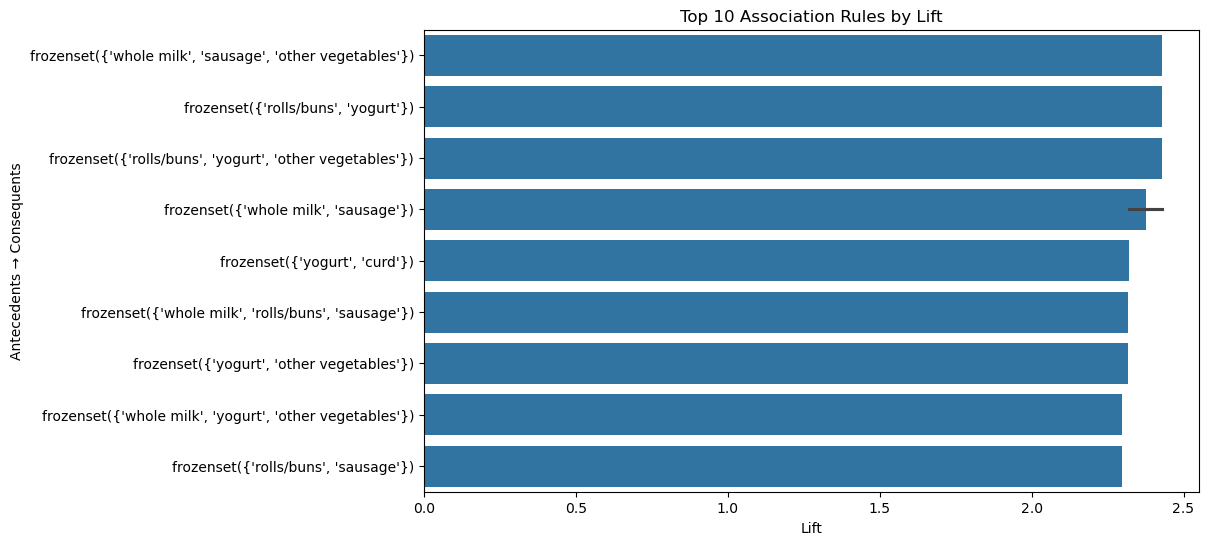

In [48]:
top10 = rules_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="lift", y=top10["antecedents"].astype(str))
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Antecedents → Consequents")
plt.show()


In [57]:
def recommend_items(selected_items, rules=rules_sorted, top_n=5):
    recommendations = {}

    for _, row in rules.iterrows():
        # row['antecedents'] is already a set
        if row['antecedents'].issubset(set(selected_items)):
            for item in row['consequents']:
                if item not in selected_items:
                    recommendations[item] = max(recommendations.get(item, 0), row.get('lift', 0))
    
    recommended_sorted = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return [item for item, _ in recommended_sorted[:top_n]]


In [58]:
all_items = sorted(list(set([i for s in rules_sorted['antecedents'] for i in s] +
                            [i for s in rules_sorted['consequents'] for i in s])))


In [59]:

# Create list of all unique items
all_items = sorted(list(set([i for s in rules_sorted['antecedents'] for i in s] +
                            [i for s in rules_sorted['consequents'] for i in s])))

In [60]:
type(rules_sorted['antecedents'][0])


frozenset

In [56]:
all_items = sorted(list(set([i for s in rules_sorted['antecedents'] for i in s] +
                            [i for s in rules_sorted['consequents'] for i in s])))
